In [1]:
#importing libraries
import pandas as pd

#load the csv file
df = pd.read_csv("Loan_default.csv")

In [2]:
print(df.shape)
print(df.dtypes)

(255347, 19)
LoanID                     object
Age                         int64
Income                      int64
LoanAmount                  int64
CreditScore                 int64
MonthsEmployed              int64
NumCreditLines              int64
InterestRate              float64
LoanTerm                    int64
DTIRatio                  float64
Education                  object
EmploymentType             object
MaritalStatus              object
HasMortgage                object
HasDependents              object
LoanPurpose                object
HasCoSigner                object
Default                     int64
Loan Date (DD/MM/YYYY)     object
dtype: object


In [3]:
print(df.head(5))

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [4]:
# Step 1: Data Quality Assessment

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate entries
duplicate_count = df.duplicated().sum()

# Check data types
data_types = df.dtypes

# Preview unique values in object columns for potential inconsistencies
unique_values = {col: df[col].unique() for col in df.select_dtypes(include='object').columns}

print(missing_values, duplicate_count, data_types, unique_values)

LoanID                    0
Age                       0
Income                    0
LoanAmount                0
CreditScore               0
MonthsEmployed            0
NumCreditLines            0
InterestRate              0
LoanTerm                  0
DTIRatio                  0
Education                 0
EmploymentType            0
MaritalStatus             0
HasMortgage               0
HasDependents             0
LoanPurpose               0
HasCoSigner               0
Default                   0
Loan Date (DD/MM/YYYY)    0
dtype: int64 0 LoanID                     object
Age                         int64
Income                      int64
LoanAmount                  int64
CreditScore                 int64
MonthsEmployed              int64
NumCreditLines              int64
InterestRate              float64
LoanTerm                    int64
DTIRatio                  float64
Education                  object
EmploymentType             object
MaritalStatus              object
HasMortgage

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


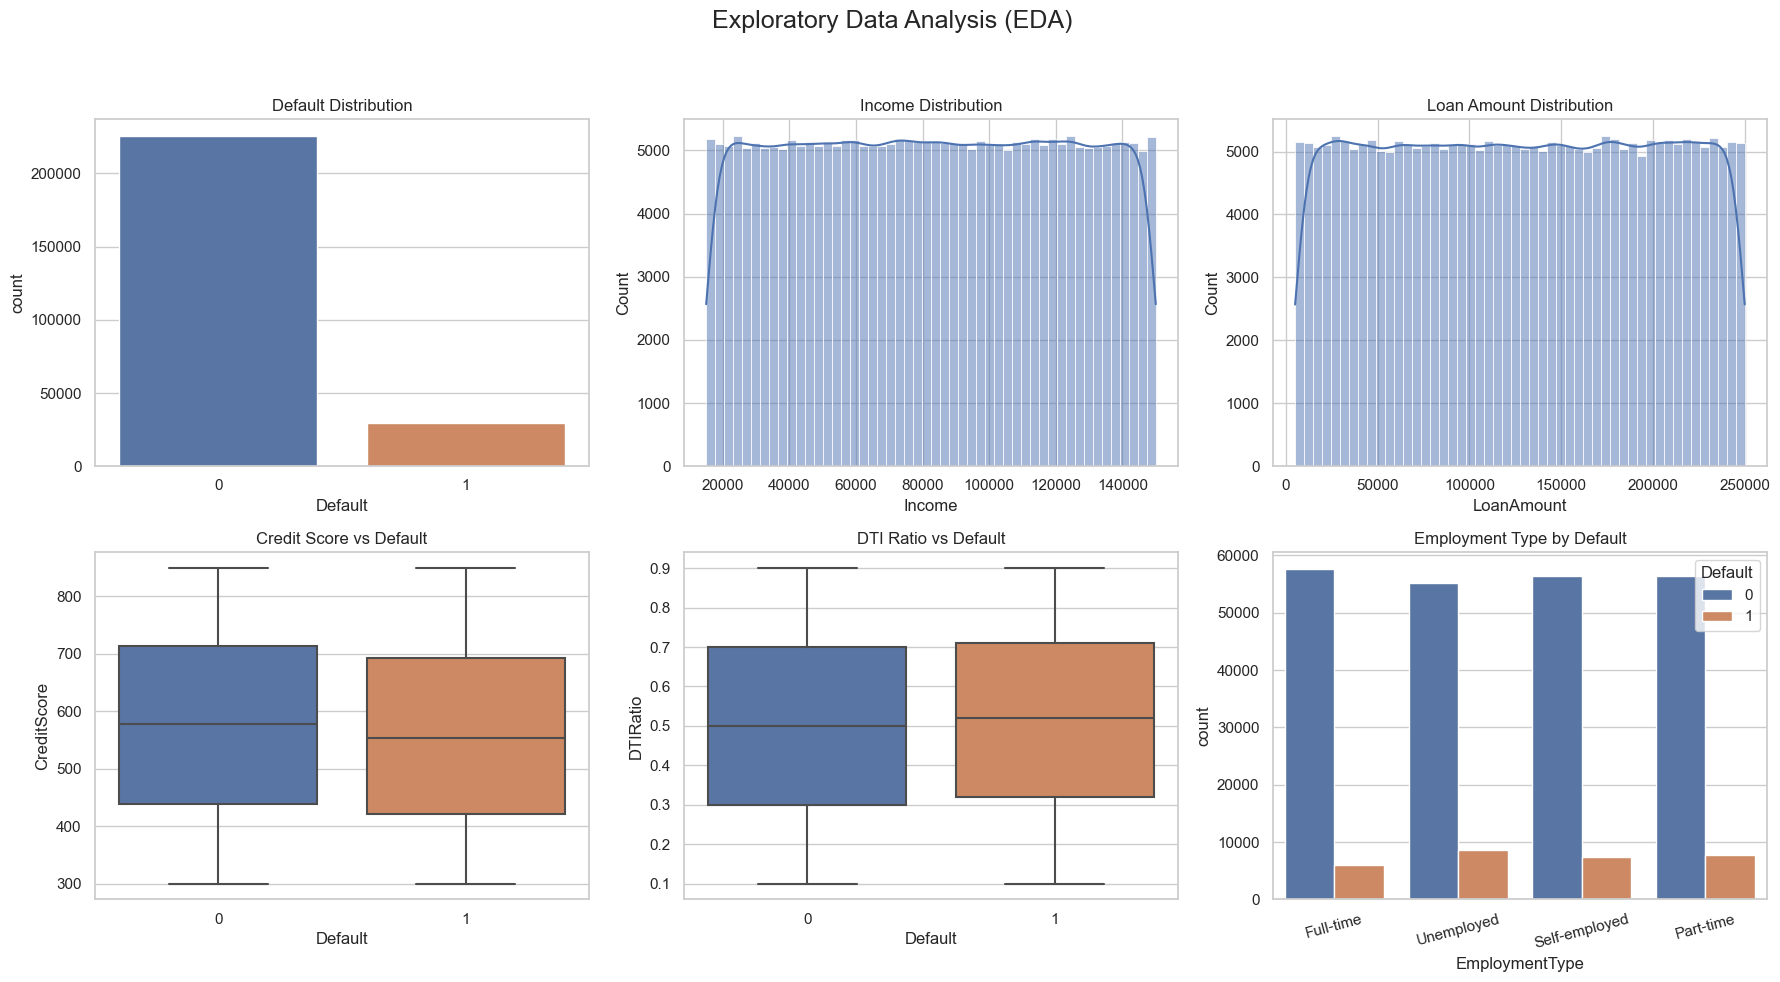

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Prepare subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Exploratory Data Analysis (EDA)", fontsize=18)

# 1. Distribution of target variable (Default)
sns.countplot(x='Default', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Default Distribution')

# 2. Income distribution
sns.histplot(df['Income'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Income Distribution')

# 3. Loan Amount distribution
sns.histplot(df['LoanAmount'], bins=50, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Loan Amount Distribution')

# 4. Credit Score vs Default
sns.boxplot(x='Default', y='CreditScore', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Credit Score vs Default')

# 5. DTIRatio vs Default
sns.boxplot(x='Default', y='DTIRatio', data=df, ax=axes[1, 1])
axes[1, 1].set_title('DTI Ratio vs Default')

# 6. Employment Type vs Default
sns.countplot(x='EmploymentType', hue='Default', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Employment Type by Default')
axes[1, 2].tick_params(axis='x', rotation=15)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [6]:
# Re-import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the re-uploaded dataset
df = pd.read_csv("Loan_default.csv")

# Convert 'Loan Date' to datetime
# Convert 'Loan Date (DD/MM/YYYY)' to datetime
df['LoanDate'] = pd.to_datetime(df['Loan Date (DD/MM/YYYY)'], errors='coerce')

# Extract date features
df['LoanYear'] = df['LoanDate'].dt.year
df['LoanMonth'] = df['LoanDate'].dt.month
df['LoanDay'] = df['LoanDate'].dt.day

# Drop the original date columns
df.drop(columns=['Loan Date (DD/MM/YYYY)', 'LoanDate', 'LoanID'], inplace=True)

# Encode binary categorical variables
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

# Label encode remaining categorical variables
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.drop(columns='Default')
y = df['Default']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Output shapes and class distribution
X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4700\1676026705.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)


((191510, 19),
 (63837, 19),
 Default
 0    0.88387
 1    0.11613
 Name: proportion, dtype: float64,
 Default
 0    0.883876
 1    0.116124
 Name: proportion, dtype: float64)

Accuracy : 0.8859
Precision: 0.6494
Recall   : 0.0372
F1 Score : 0.0704


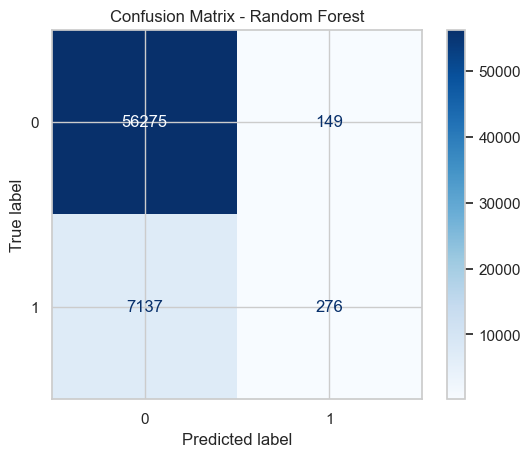

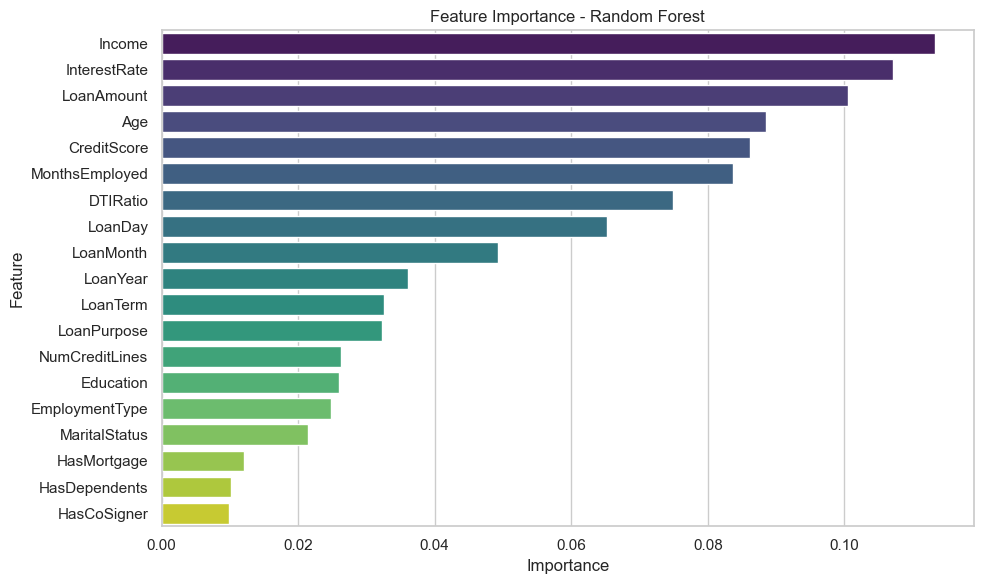

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


In [9]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB 326.8 kB/s eta 0:02:54
   ---------------------------------------- 0.2/56.8 MB 1.2 MB/s eta 0:00:49
   ---------------------------------------- 0.7/56.8 MB 3.6 MB/s eta 0:00:16
    --------------------------------------- 1.3/56.8 MB 5.6 MB/s eta 0:00:10
   - -------------------------------------- 2.1/56.8 MB 7.4 MB/s eta 0:00:08
   - -------------------------------------- 2.8/56.8 MB 9.0 MB/s eta 0:00:07
   -- ------------------------------------- 3.5/56.8 MB 9.8 MB/s eta 0:00:06
   --- ------------------------------------ 4.3/56.8 MB 10.3 MB/s eta 0:00:06
   --- ------------------------------------ 4.5/56.8 MB 9.3 MB/s eta 0:00:06
   ---- ----------------------------------- 5.9/56.8 MB 11.1 MB/s eta 0:00:05
   ---- ----------------------------------- 6.6/56.8 MB 11.3 MB/s eta 0:00:05
   -----

In [10]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {"Accuracy": acc, "ROC AUC": auc}
    print(f"=== {name} ===")
    print("Accuracy:", round(acc, 4))
    print("ROC AUC:", round(auc, 4))
    print(classification_report(y_test, y_pred))
    print("-" * 40)

# Compare results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


=== Logistic Regression ===
Accuracy: 0.8846
ROC AUC: 0.7415
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56424
           1       0.60      0.02      0.04      7413

    accuracy                           0.88     63837
   macro avg       0.74      0.51      0.49     63837
weighted avg       0.85      0.88      0.83     63837

----------------------------------------
=== Random Forest ===
Accuracy: 0.8859
ROC AUC: 0.7409
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56424
           1       0.66      0.04      0.07      7413

    accuracy                           0.89     63837
   macro avg       0.77      0.52      0.50     63837
weighted avg       0.86      0.89      0.84     63837

----------------------------------------


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:00:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
Accuracy: 0.8853
ROC AUC: 0.7438
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56424
           1       0.54      0.08      0.14      7413

    accuracy                           0.89     63837
   macro avg       0.72      0.54      0.54     63837
weighted avg       0.85      0.89      0.85     63837

----------------------------------------
                     Accuracy   ROC AUC
Logistic Regression  0.884612  0.741510
Random Forest        0.885944  0.740865
XGBoost              0.885333  0.743783
